# Explore here

#### Import Packages

In [88]:
import os
from dotenv import load_dotenv
import pandas as pd
import spotipy

#### Connect to Spotify API

In [89]:
from spotipy.oauth2 import SpotifyClientCredentials

# Load the .env
load_dotenv()
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

# Establish connection to Spotify API
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

#### API queries into Spotify


In [73]:
# Select an Artist
artist_id = '4RNK7DL34RKDzb24yksnGJ'

# Query and save results to a variable
query = sp.artist_top_tracks(artist_id)
top_tracks = query['tracks']

# Create a list to store the track information
track_info = []

# Iterate over the top tracks and extract the desired information
for track in top_tracks:
    track_name = track['name']
    track_popularity = track['popularity']
    track_duration_ms = track['duration_ms']
    track_duration_min = round(track_duration_ms / 60000, 2) 
    track_info.append({
        'name': track_name,
        'popularity': track_popularity,
        'duration_min': track_duration_min
    })


[{'name': 'Apollo 12 - Original Mix', 'popularity': 11, 'duration_min': 6.02}, {'name': 'Staking Nodes', 'popularity': 6, 'duration_min': 5.07}, {'name': 'Out of Curiosity', 'popularity': 6, 'duration_min': 5.09}, {'name': 'Jysku', 'popularity': 5, 'duration_min': 5.22}, {'name': 'Atlantiq - Original Mix', 'popularity': 5, 'duration_min': 5.62}, {'name': 'Argument', 'popularity': 5, 'duration_min': 5.72}, {'name': 'Carry Pack', 'popularity': 5, 'duration_min': 6.77}, {'name': 'John the Dentist', 'popularity': 4, 'duration_min': 4.96}, {'name': 'Recession is 2 Quarters', 'popularity': 4, 'duration_min': 5.48}, {'name': 'Oxaltoxom', 'popularity': 4, 'duration_min': 6.18}]


#### Transform into Dataframe

In [87]:
# Convert the tracks_info Dict to a DF
tracksdf = pd.DataFrame.from_records(track_info)

# Sort by Popularity
tracksdf.sort_values(['popularity'], inplace=True)

# Print the top 3
tracksdf.head(3)

,name,popularity,duration_min
7,John the Dentist,4,4.96
8,Recession is 2 Quarters,4,5.48
9,Oxaltoxom,4,6.18


#### Plot a graphic


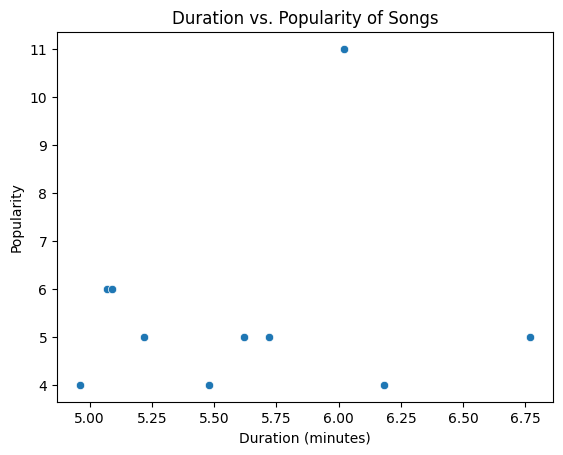

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot using seaborn
sns.scatterplot(data=tracksdf, x='duration_min', y='popularity')

# Set the plot labels and title
plt.xlabel('Duration (minutes)')
plt.ylabel('Popularity')
plt.title('Duration vs. Popularity of Songs')

# Display the plot
plt.show()


## Relationship

As we can see with the scatterplot, there's no direct relationship. We can't say by looking at an artist top 10, that his shorter tracks are more popular. In such little data (10 tracks) we have a longer one who's way more popular for example. 